In [46]:
from __future__ import division

In [47]:
import numpy as np

In [48]:
import matplotlib.pyplot as plt

In [49]:
from PIL import Image

In [50]:
from numpy.linalg import norm
from random import normalvariate
from math import sqrt

In [51]:
%matplotlib inline

In [52]:
img_file = "spideymeme.jpeg"

In [53]:
image = np.array(Image.open(img_file))

In [54]:
image = image / 255
row, col, _ = image.shape
print("pixels: " + str(row) + "*" + str(col))

pixels: 720*1280


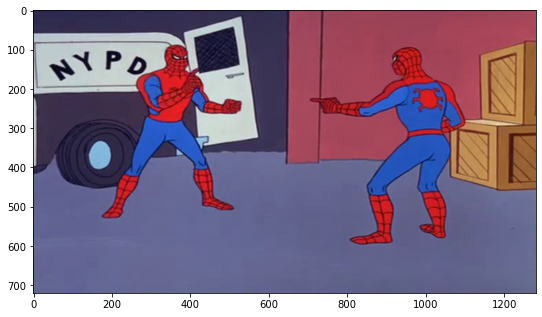

In [55]:
fig = plt.figure(figsize=(9,6))
#a = fig.add_subplot(1,1,1)
imgplot = plt.imshow(image)
#a.set_title("Castle Hill, Budapest")
plt.show()

In [56]:
img_r = image[:,:,0]
img_g = image[:,:,1]
img_b = image[:,:,2]

In [57]:
og_size = image.nbytes
print("Original size of image (bytes): " + str(og_size))

Original size of image (bytes): 22118400


In [58]:
def rando_unit_vector(n):
    unnormalized = [normalvariate(0,1) for _ in range(n)]
    theNorm = sqrt(sum(x * x for x in unnormalized))
    return [x / theNorm for x in unnormalized]

def svd_1d(A, epsilon=1e-10):
    n, m = A.shape
    x = rando_unit_vector(min(n,m))
    lastV = None
    currV = x
    
    if n > m:
        B = np.dot(A.T, A)
    else:
        B = np.dot(A, A.T)
        
    iters = 0;
    while True:
        iters += 1;
        lastV = currV
        currV = np.dot(B, lastV)
        currV = currV / norm(currV)
        
        if abs(np.dot(currV, lastV)) > 1 - epsilon:
            print("converged in {} iterations".format(iters))
            return currV

def custom_svd(A, k=None, epsilon=1e-10):
    A = np.array(A)
    n, m = A.shape
    currSVD = []
    
    if k is None:
        k = min(n,m)
        
    for i in range(k):
        matrix_for_1d = A.copy()
        
        for singular_value, u, v in currSVD[:i]:
            matrix_for_1d -= singular_value * np.outer(u,v)
        
        if n > m:
            v = svd_1d(matrix_for_1d, epsilon=epsilon)
            u_unnormalized = np.dot(A, v)
            sigma = norm(u_unnormalized)
            u = u_unnormalized / sigma
        else:
            u = svd_1d(matrix_for_1d, epsilon=epsilon)
            v_unnormalized = np.dot(A.T, u)
            sigma = norm(v_unnormalized)
            v = v_unnormalized / sigma
            
        currSVD.append((sigma,u,v))
        
    singular_values, us, vs = [np.array(x) for x in zip(*currSVD)]
    return us.T, singular_values, vs
# https://github.com/j2kun/svd/blob/main/svd.py

In [59]:
k = 50

In [60]:
U_r, d_r, V_r = custom_svd(img_r, k) #np.linalg.svd(img_r, full_matrices=True)
U_g, d_g, V_g = custom_svd(img_g, k) #np.linalg.svd(img_g, full_matrices=True)
U_b, d_b, V_b = custom_svd(img_b, k) #np.linalg.svd(img_b, full_matrices=True)

converged in 6 iterations
converged in 17 iterations
converged in 34 iterations
converged in 33 iterations
converged in 38 iterations
converged in 31 iterations
converged in 28 iterations
converged in 59 iterations
converged in 40 iterations
converged in 39 iterations
converged in 45 iterations
converged in 220 iterations
converged in 100 iterations
converged in 50 iterations
converged in 42 iterations
converged in 262 iterations
converged in 54 iterations
converged in 204 iterations
converged in 71 iterations
converged in 400 iterations
converged in 177 iterations
converged in 141 iterations
converged in 106 iterations
converged in 153 iterations
converged in 79 iterations
converged in 226 iterations
converged in 64 iterations
converged in 117 iterations
converged in 161 iterations
converged in 326 iterations
converged in 89 iterations
converged in 490 iterations
converged in 90 iterations
converged in 736 iterations
converged in 99 iterations
converged in 281 iterations
converged in 

In [61]:
matrix_storage = sum([matrix.nbytes for matrix in [U_r, d_r, V_r, U_g, d_g, V_g, U_b, d_b, V_g]])
print("Size of matrices to store (bytes): " + str(matrix_storage))

Size of matrices to store (bytes): 2401200


In [62]:
U_r_k = U_r[:, 0:k]
V_r_k = V_r[0:k, :]
U_g_k = U_g[:, 0:k]
V_g_k = V_g[0:k, :]
U_b_k = U_b[:, 0:k]
V_b_k = V_b[0:k, :]

d_r_k = d_r[0:k]
d_g_k = d_g[0:k]
d_b_k = d_b[0:k]

In [63]:
compressed_size = sum([matrix.nbytes for matrix in[U_r_k, d_r_k, V_r_k, U_g_k, d_g_k, V_g_k, U_b_k, d_b_k, V_b_k]])
print("Compressed matrices size (bytes): " + str(compressed_size))

Compressed matrices size (bytes): 2401200


In [64]:
compression_ratio = compressed_size / og_size
print("Compression ratio: " + str(compression_ratio))

Compression ratio: 0.10856119791666667


In [65]:
img_r_approx = np.dot(U_r_k, np.dot(np.diag(d_r_k), V_r_k))
img_g_approx = np.dot(U_g_k, np.dot(np.diag(d_g_k), V_g_k))
img_b_approx = np.dot(U_b_k, np.dot(np.diag(d_b_k), V_b_k))

In [66]:
reconstructed_img = np.zeros((row,col,3))
reconstructed_img[:,:,0] = img_r_approx
reconstructed_img[:,:,1] = img_g_approx
reconstructed_img[:,:,2] = img_b_approx

In [67]:
reconstructed_img[reconstructed_img < 0] = 0
reconstructed_img[reconstructed_img > 1] = 1

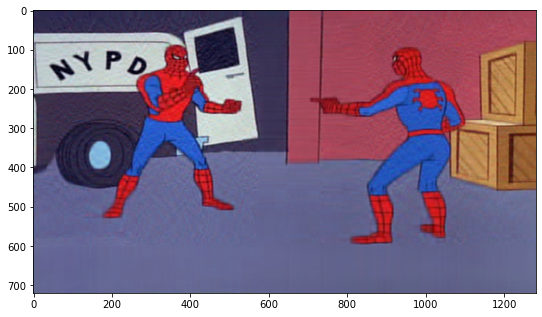

In [68]:
fig = plt.figure(figsize=(9,6))
imgplot = plt.imshow(reconstructed_img)
plt.show()